In [1]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CustomerData.csv')

In [3]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1,37.0,Male,USA,True,NaN,99.0,BabyCare,Cash,Offline
1,2,44.0,NaN,Russia,False,463034.0,21.0,BabyCare,Bank Transfer,NaN
2,3,900.0,Female,India,True,402865.0,31.0,Medical,UPI,Offline
3,4,46.0,NaN,USA,True,NaN,21.0,BabyCare,UPI,Offline
4,5,19.0,Female,Australia,True,221868.0,45.0,Medical,Bank Transfer,Online


In [4]:
df.loc[df['Age'] > 100, 'Age'] = np.nan

In [5]:
df['Age'] = df['Age'].fillna(int(df['Age'].mean()))
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Employed'] = df['Employed'].fillna(df['Employed'].mode()[0])
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['ItemsPurchased(monthly)'] = df['ItemsPurchased(monthly)'].fillna(int(df['ItemsPurchased(monthly)'].mean()))
df['ProductType'] = df['ProductType'].fillna(df['ProductType'].mode()[0])
df['PaymentType'] = df['PaymentType'].fillna(df['PaymentType'].mode()[0])
df['Mode'] = df['Mode'].fillna(df['Mode'].mode()[0])

In [6]:
df[['Gender', 'Country', 'Employed', 'ProductType', 'PaymentType', 'Mode']] = df[['Gender', 'Country', 'Employed', 'ProductType', 'PaymentType', 'Mode']].apply(LabelEncoder().fit_transform)

In [7]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1,37.0,1,4,1,242613.630435,99.0,1,1,0
1,2,44.0,1,1,0,463034.000000,21.0,1,0,1
2,3,50.0,0,3,1,402865.000000,31.0,4,2,0
3,4,46.0,1,4,1,242613.630435,21.0,1,2,0
4,5,19.0,0,2,1,221868.000000,45.0,4,0,1


In [8]:
X = df[['Age','Gender','Income','ItemsPurchased(monthly)']]
y = df['Mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
bagging_classifier = BaggingClassifier(random_state=0).fit(X_train, y_train)
y_pred_bag = bagging_classifier.predict(X_test)
y_pred_prob_bag = bagging_classifier.predict_proba(X_test)

print(metrics.confusion_matrix(y_test, y_pred_bag, labels=[0, 1, 2]))
print(metrics.classification_report(y_test, y_pred_bag))

[[2 3 0]
 [2 8 0]
 [0 0 0]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.73      0.80      0.76        10

    accuracy                           0.67        15
   macro avg       0.61      0.60      0.60        15
weighted avg       0.65      0.67      0.66        15



In [10]:
boosting_classifier = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
y_pred_boost = boosting_classifier.predict(X_test)
y_pred_prob_boost = boosting_classifier.predict_proba(X_test)

print(metrics.confusion_matrix(y_test, y_pred_boost, labels=[0, 1, 2]))
print(metrics.classification_report(y_test, y_pred_boost))

[[1 4 0]
 [2 8 0]
 [0 0 0]]
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.67      0.80      0.73        10

    accuracy                           0.60        15
   macro avg       0.50      0.50      0.49        15
weighted avg       0.56      0.60      0.57        15



Bagging method ROC-AUC score:  0.5900000000000001
Boosting method ROC-AUC score:  0.6000000000000001


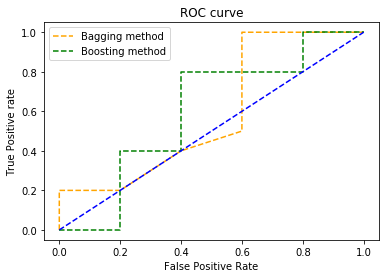

In [11]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, y_pred_prob_bag[:,1], pos_label=1)
fpr2, tpr2, thresh2 = metrics.roc_curve(y_test, y_pred_prob_boost[:,1], pos_label=1)
 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = metrics.roc_auc_score(y_test, y_pred_prob_bag[:,1])
auc_score2 = metrics.roc_auc_score(y_test, y_pred_prob_boost[:,1])
print('Bagging method ROC-AUC score: ', auc_score1)
print('Boosting method ROC-AUC score: ', auc_score2)

plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Bagging method')
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='Boosting method')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()